# Cattle disease prediction using Machine Learning

**Project:**Cattle-disease-prediction-using-Machine-Learning.
**Author:** Praise G
**Date:** 24/01/24
**Description:** 
Cattle disease prediction using Machine Learning. This project is used to predict the disease based on the symptoms. It predicts using 4 different machine learning algorithms. So, the output is accurate.
**Github:**https://github.com/godwins3/Cattle-disease-prediction

In [1]:
#Importing libraries and packages
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tkinter import *
import numpy as np
import pandas as pd
import os

In [2]:
#List of the all symptoms is listed here in list l1.

l1=['anorexia','abdominal_pain','anaemia','abortions','acetone','aggression','arthrogyposis',
    'ankylosis','anxiety','bellowing','blood_loss','blood_poisoning','blisters','colic','Condemnation_of_livers',
    'coughing','depression','discomfort','dyspnea','dysentery','diarrhoea','dehydration','drooling',
    'dull','decreased_fertility','diffculty_breath','emaciation','encephalitis','fever','facial_paralysis','frothing_of_mouth',
    'frothing','gaseous_stomach','highly_diarrhoea','high_pulse_rate','high_temp','high_proportion','hyperaemia','hydrocephalus',
    'isolation_from_herd','infertility','intermittent_fever','jaundice','ketosis','loss_of_appetite','lameness',
    'lack_of-coordination','lethargy','lacrimation','milk_flakes','milk_watery','milk_clots',
    'mild_diarrhoea','moaning','mucosal_lesions','milk_fever','nausea','nasel_discharges','oedema',
    'pain','painful_tongue','pneumonia','photo_sensitization','quivering_lips','reduction_milk_vields','rapid_breathing',
    'rumenstasis','reduced_rumination','reduced_fertility','reduced_fat','reduces_feed_intake','raised_breathing','stomach_pain',
    'salivation','stillbirths','shallow_breathing','swollen_pharyngeal','swelling','saliva','swollen_tongue',
    'tachycardia','torticollis','udder_swelling','udder_heat','udder_hardeness','udder_redness','udder_pain','unwillingness_to_move',
    'ulcers','vomiting','weight_loss','weakness']

In [3]:
#List of Diseases (26 Cattle Diseases Mention) is listed in list disease.

disease=['mastitis','blackleg','bloat','coccidiosis','cryptosporidiosis',
        'displaced_abomasum','gut_worms','listeriosis','liver_fluke','necrotic_enteritis','peri_weaning_diarrhoea',
        ' rift_valley_fever','rumen_acidosis',
        'traumatic_reticulitis','calf_diphtheria','foot_rot','foot_and_mouth','ragwort_poisoning','wooden_tongue','infectious_bovine_rhinotracheitis',
'acetonaemia','fatty_liver_syndrome','calf_pneumonia','schmallen_berg_virus','trypanosomosis','fog_fever']

#disease = [df['prognosis'].unique()]
#print(disease)

In [4]:
l2=[]
for i in range(0,len(l1)):
    l2.append(0)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
#Reading the Cattle training Dataset .csv file
df=pd.read_csv("Training.csv")
DF= pd.read_csv('Training.csv', index_col='prognosis')
#Replace the values in the imported file by pandas by the inbuilt function replace in pandas.

df.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
#df.head()
DF.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_swelling,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness
prognosis,,,,,,,,,,,,,,,,,,,,,
mastitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
mastitis,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [6]:
df = pd.DataFrame(df)

In [7]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = round((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [8]:
df.isnull().sum()

anorexia          0
abdominal_pain    0
anaemia           0
abortions         0
acetone           0
                 ..
ulcers            0
vomiting          0
weight_loss       0
weakness          0
prognosis         0
Length: 94, dtype: int64

In [9]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


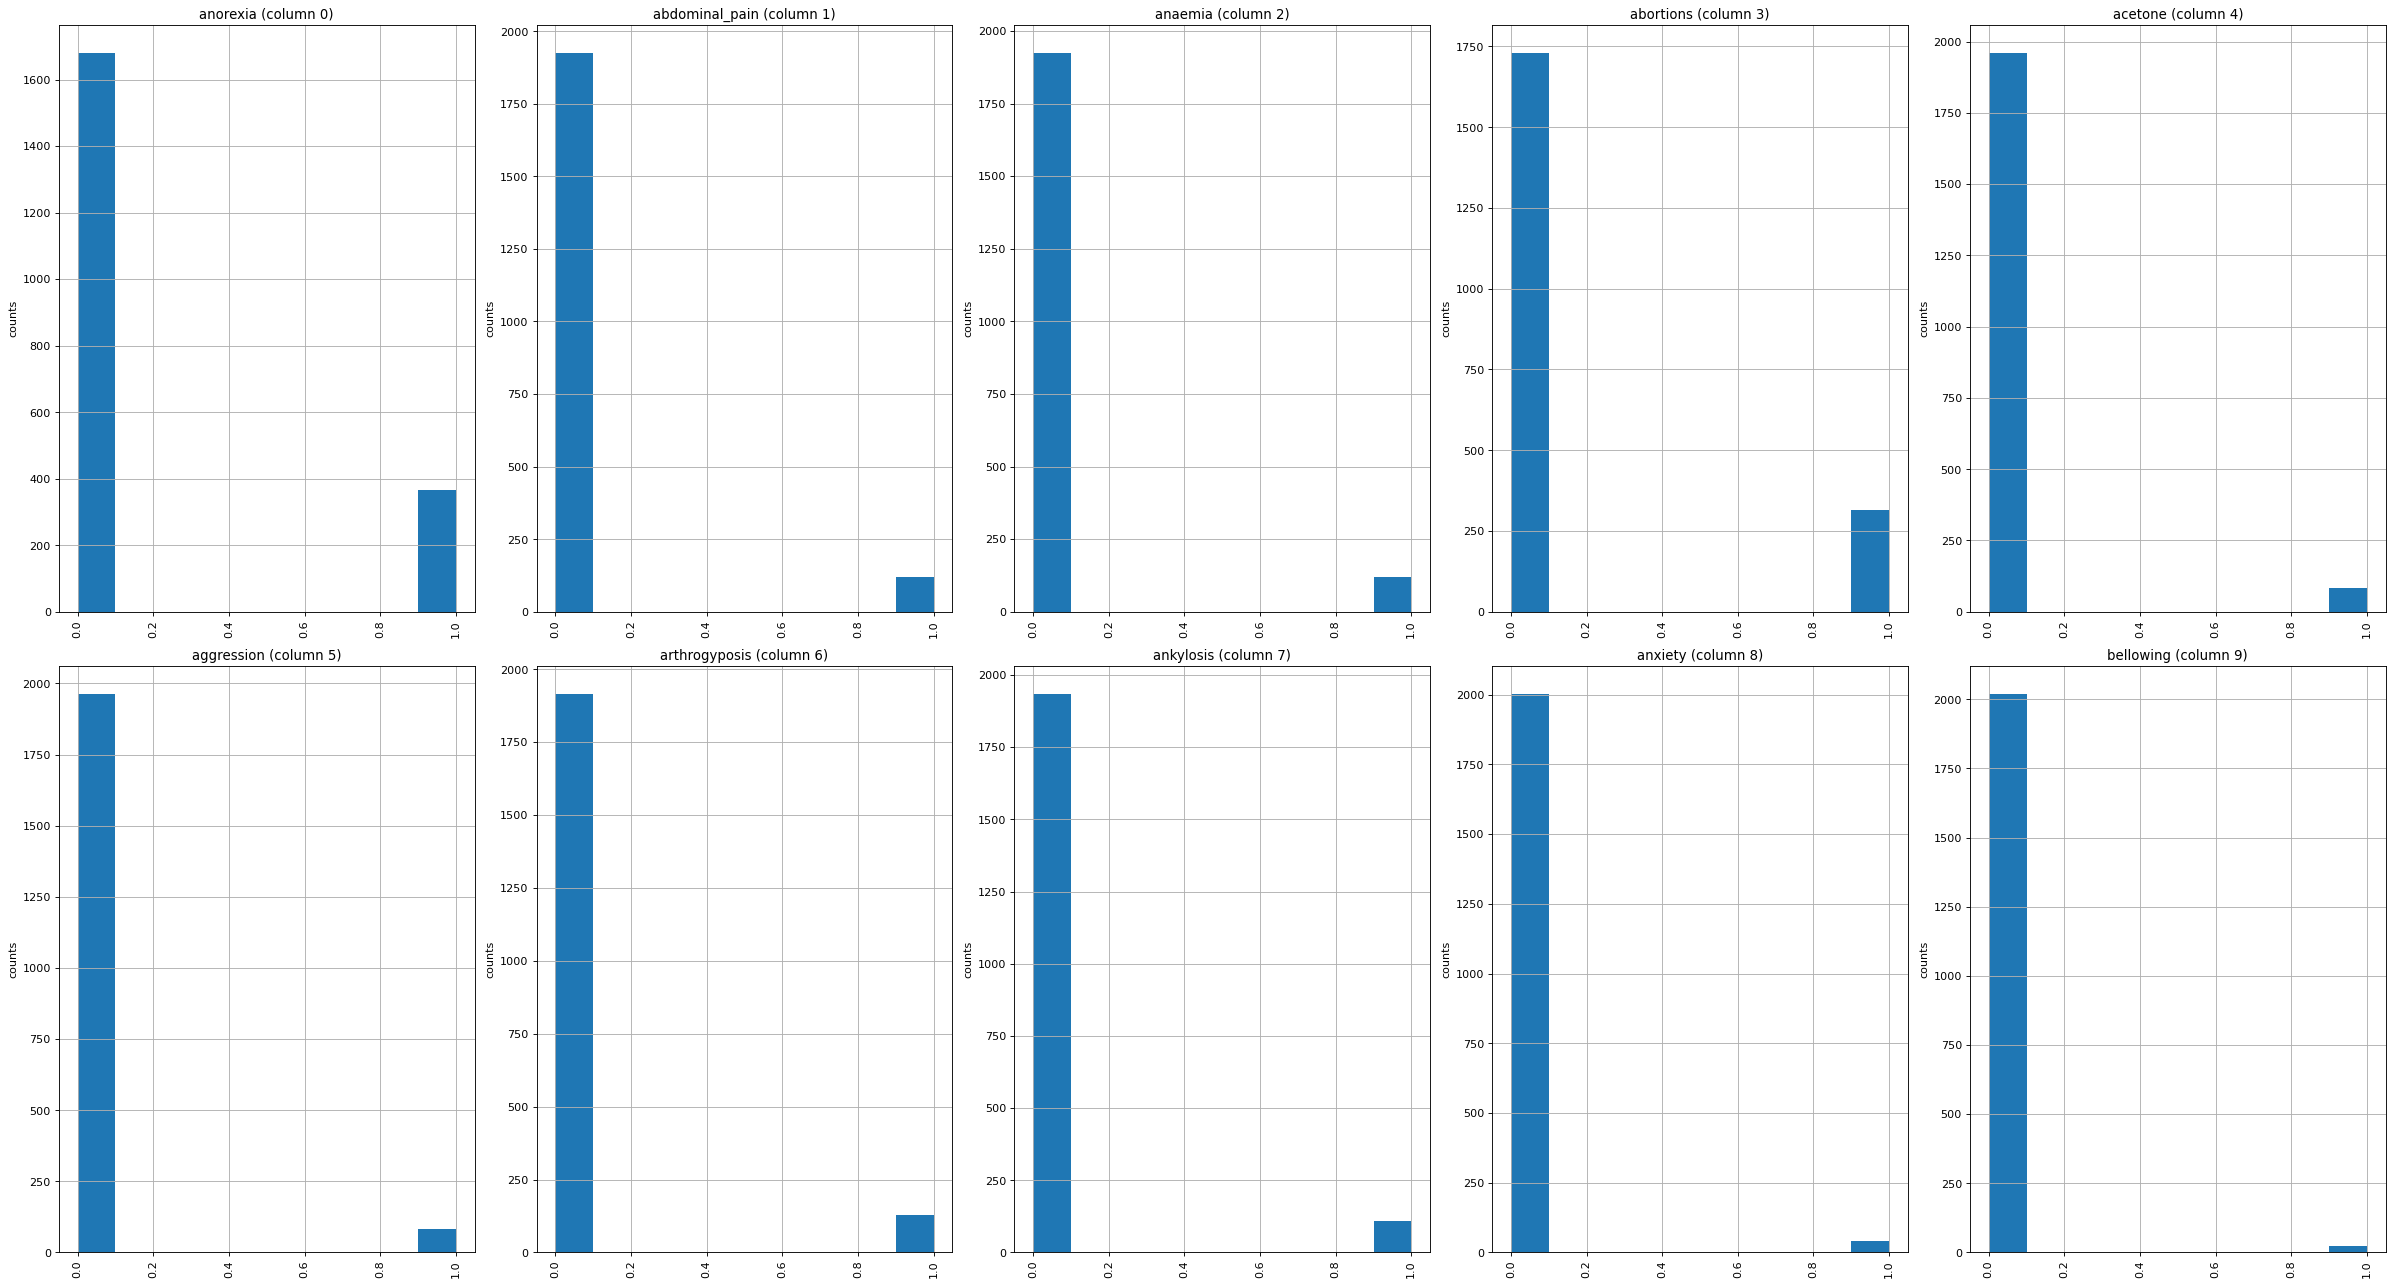

In [10]:
plotPerColumnDistribution(df, 10, 5)

In [11]:
plotScatterMatrix(df, 20, 10)

In [12]:
X= df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0            0               0        0          0        0           0   
1            0               0        0          0        0           0   
2            0               0        0          0        0           0   
3            0               0        0          0        0           0   
4            0               0        0          0        0           0   
...        ...             ...      ...        ...      ...         ...   
2039         0               0        0          0        0           0   
2040         0               0        0          0        0           0   
2041         0               0        0          0        0           0   
2042         0               0        0          0        0           0   
2043         0               0        0          0        0           0   

      arthrogyposis  ankylosis  anxiety  bellowing  ...  udder_swelling  \
0                 0     

In [13]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
2039         12
2040         12
2041         12
2042         12
2043         13

[2044 rows x 1 columns]


In [14]:
#Reading the Cattle testing Dataset .csv file
tr=pd.read_csv("Testing.csv")

#Using inbuilt function replace in pandas for replacing the values

tr.replace({'prognosis':{'mastitis':0,'blackleg':1,'bloat':2,'coccidiosis':3,'cryptosporidiosis':4,
'displaced_abomasum':5,'gut_worms':6,'listeriosis':7,'liver_fluke':8,'necrotic_enteritis':9,'peri_weaning_diarrhoea':10,
'rift_valley_fever':11,'rumen_acidosis':12,
'traumatic_reticulitis':13,'calf_diphtheria':14,'foot_rot':15,'foot_and_mouth':16,'ragwort_poisoning':17,'wooden_tongue':18,'infectious_bovine_rhinotracheitis':19,
'acetonaemia':20,'fatty_liver_syndrome':21,'calf_pneumonia':22,'schmallen_berg_virus':23,'trypanosomosis':24,'fog_fever':25}},inplace=True)
tr.head()

,anorexia,abdominal_pain,anaemia,abortions,acetone,aggression,arthrogyposis,ankylosis,anxiety,bellowing,...,udder_heat,udder_hardeness,udder_redness,udder_pain,unwillingness_to_move,ulcers,vomiting,weight_loss,weakness,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4


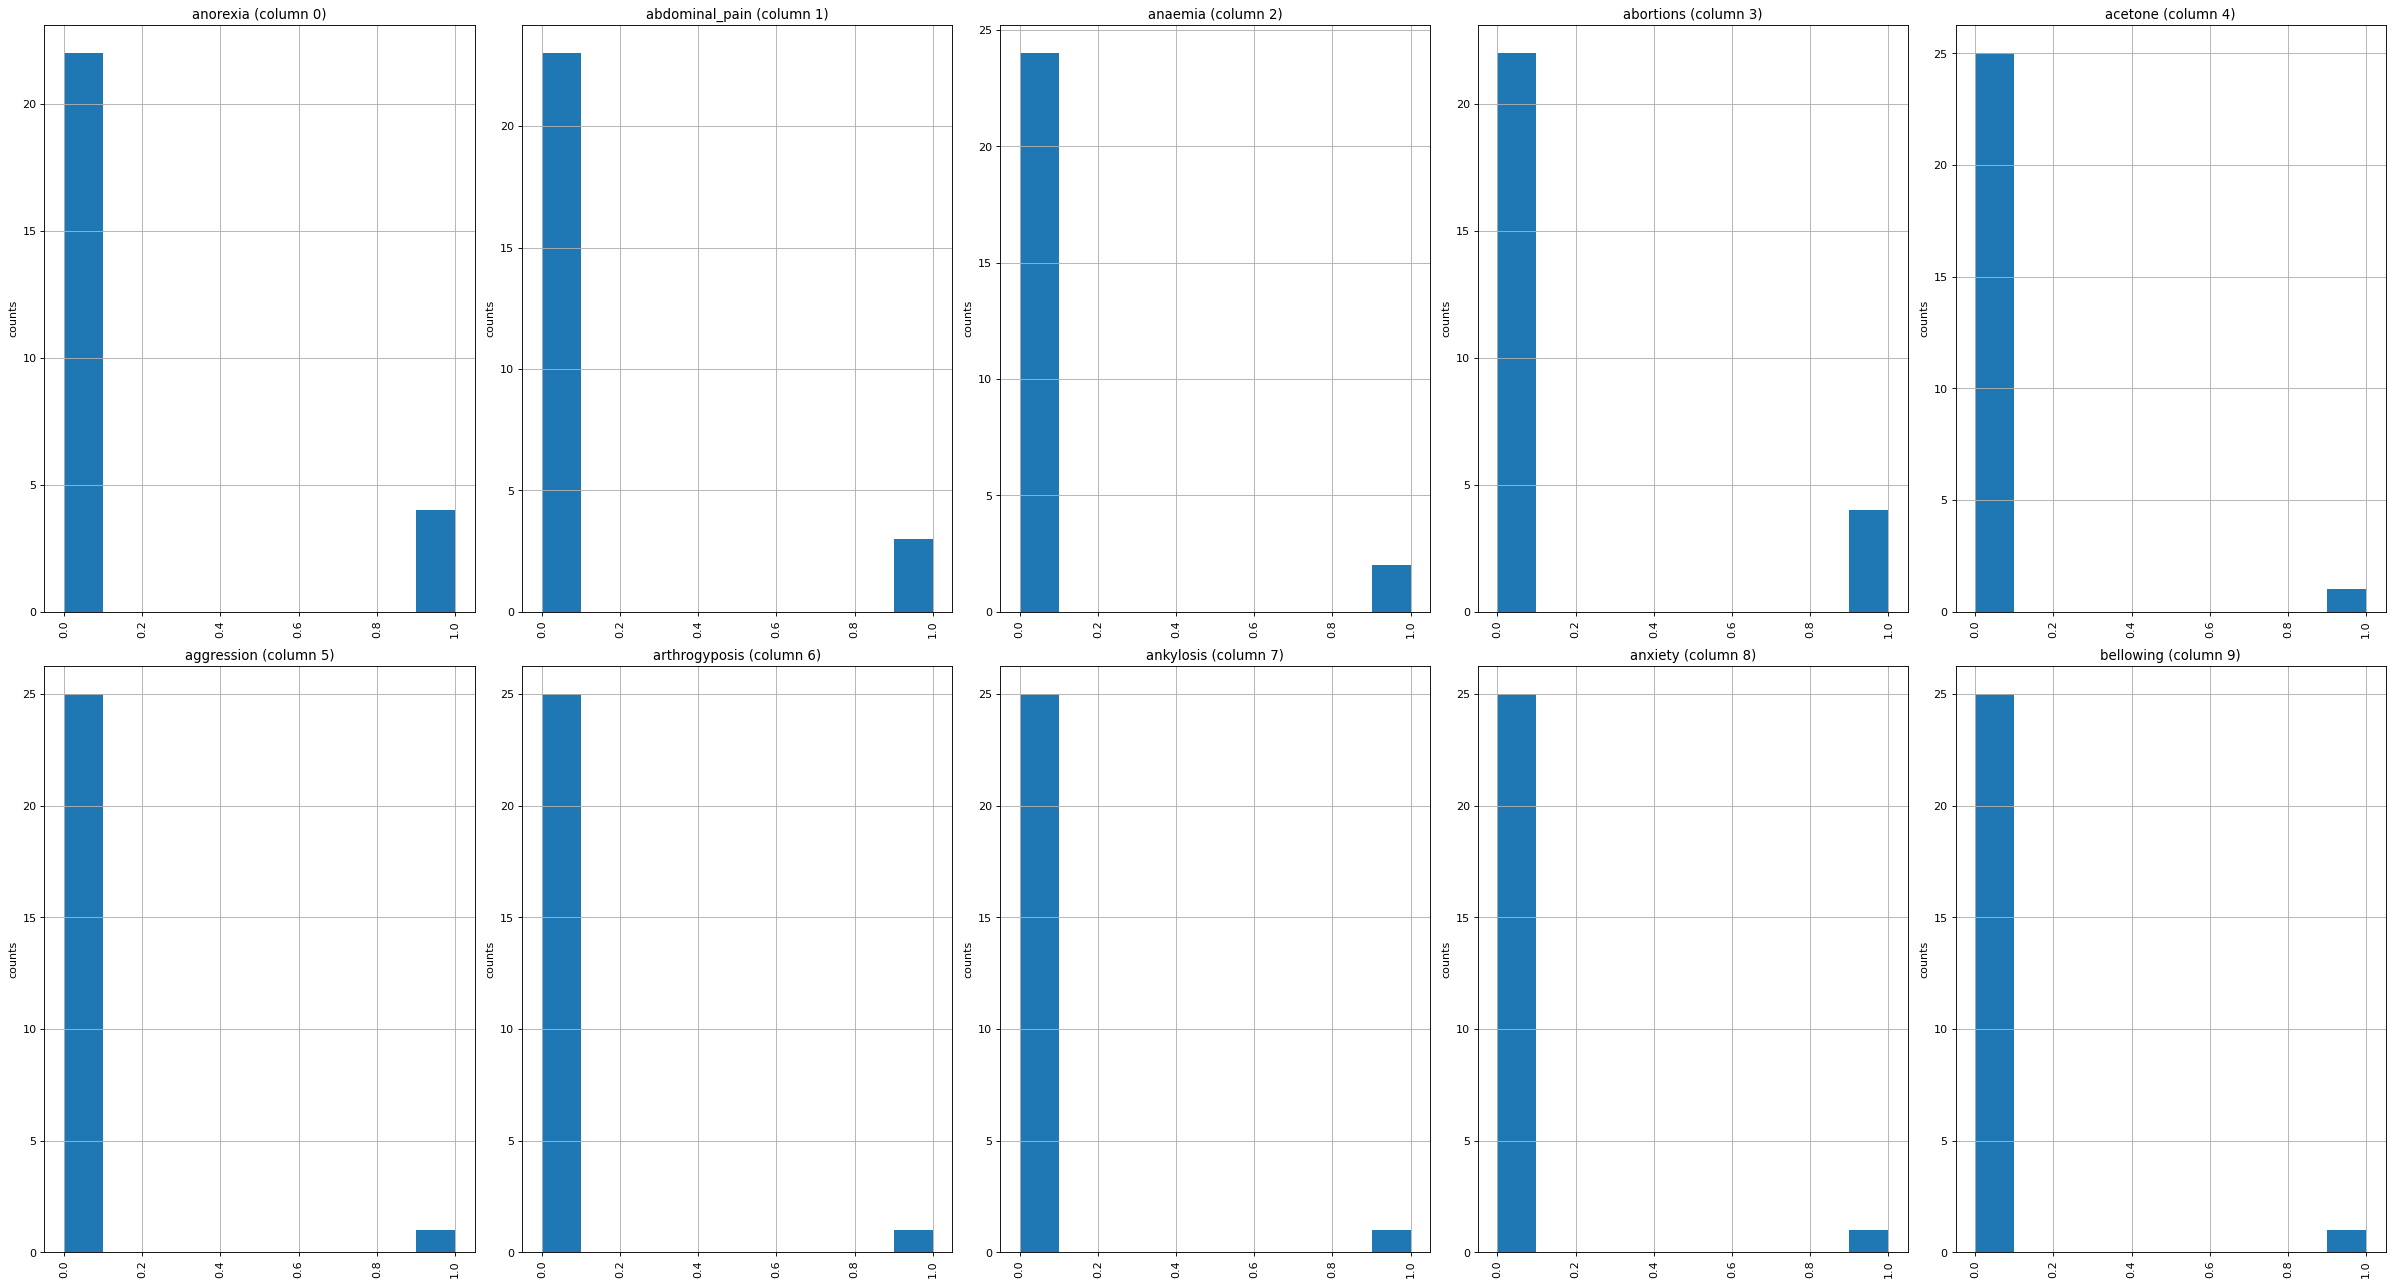

In [15]:
plotPerColumnDistribution(tr, 10, 5)

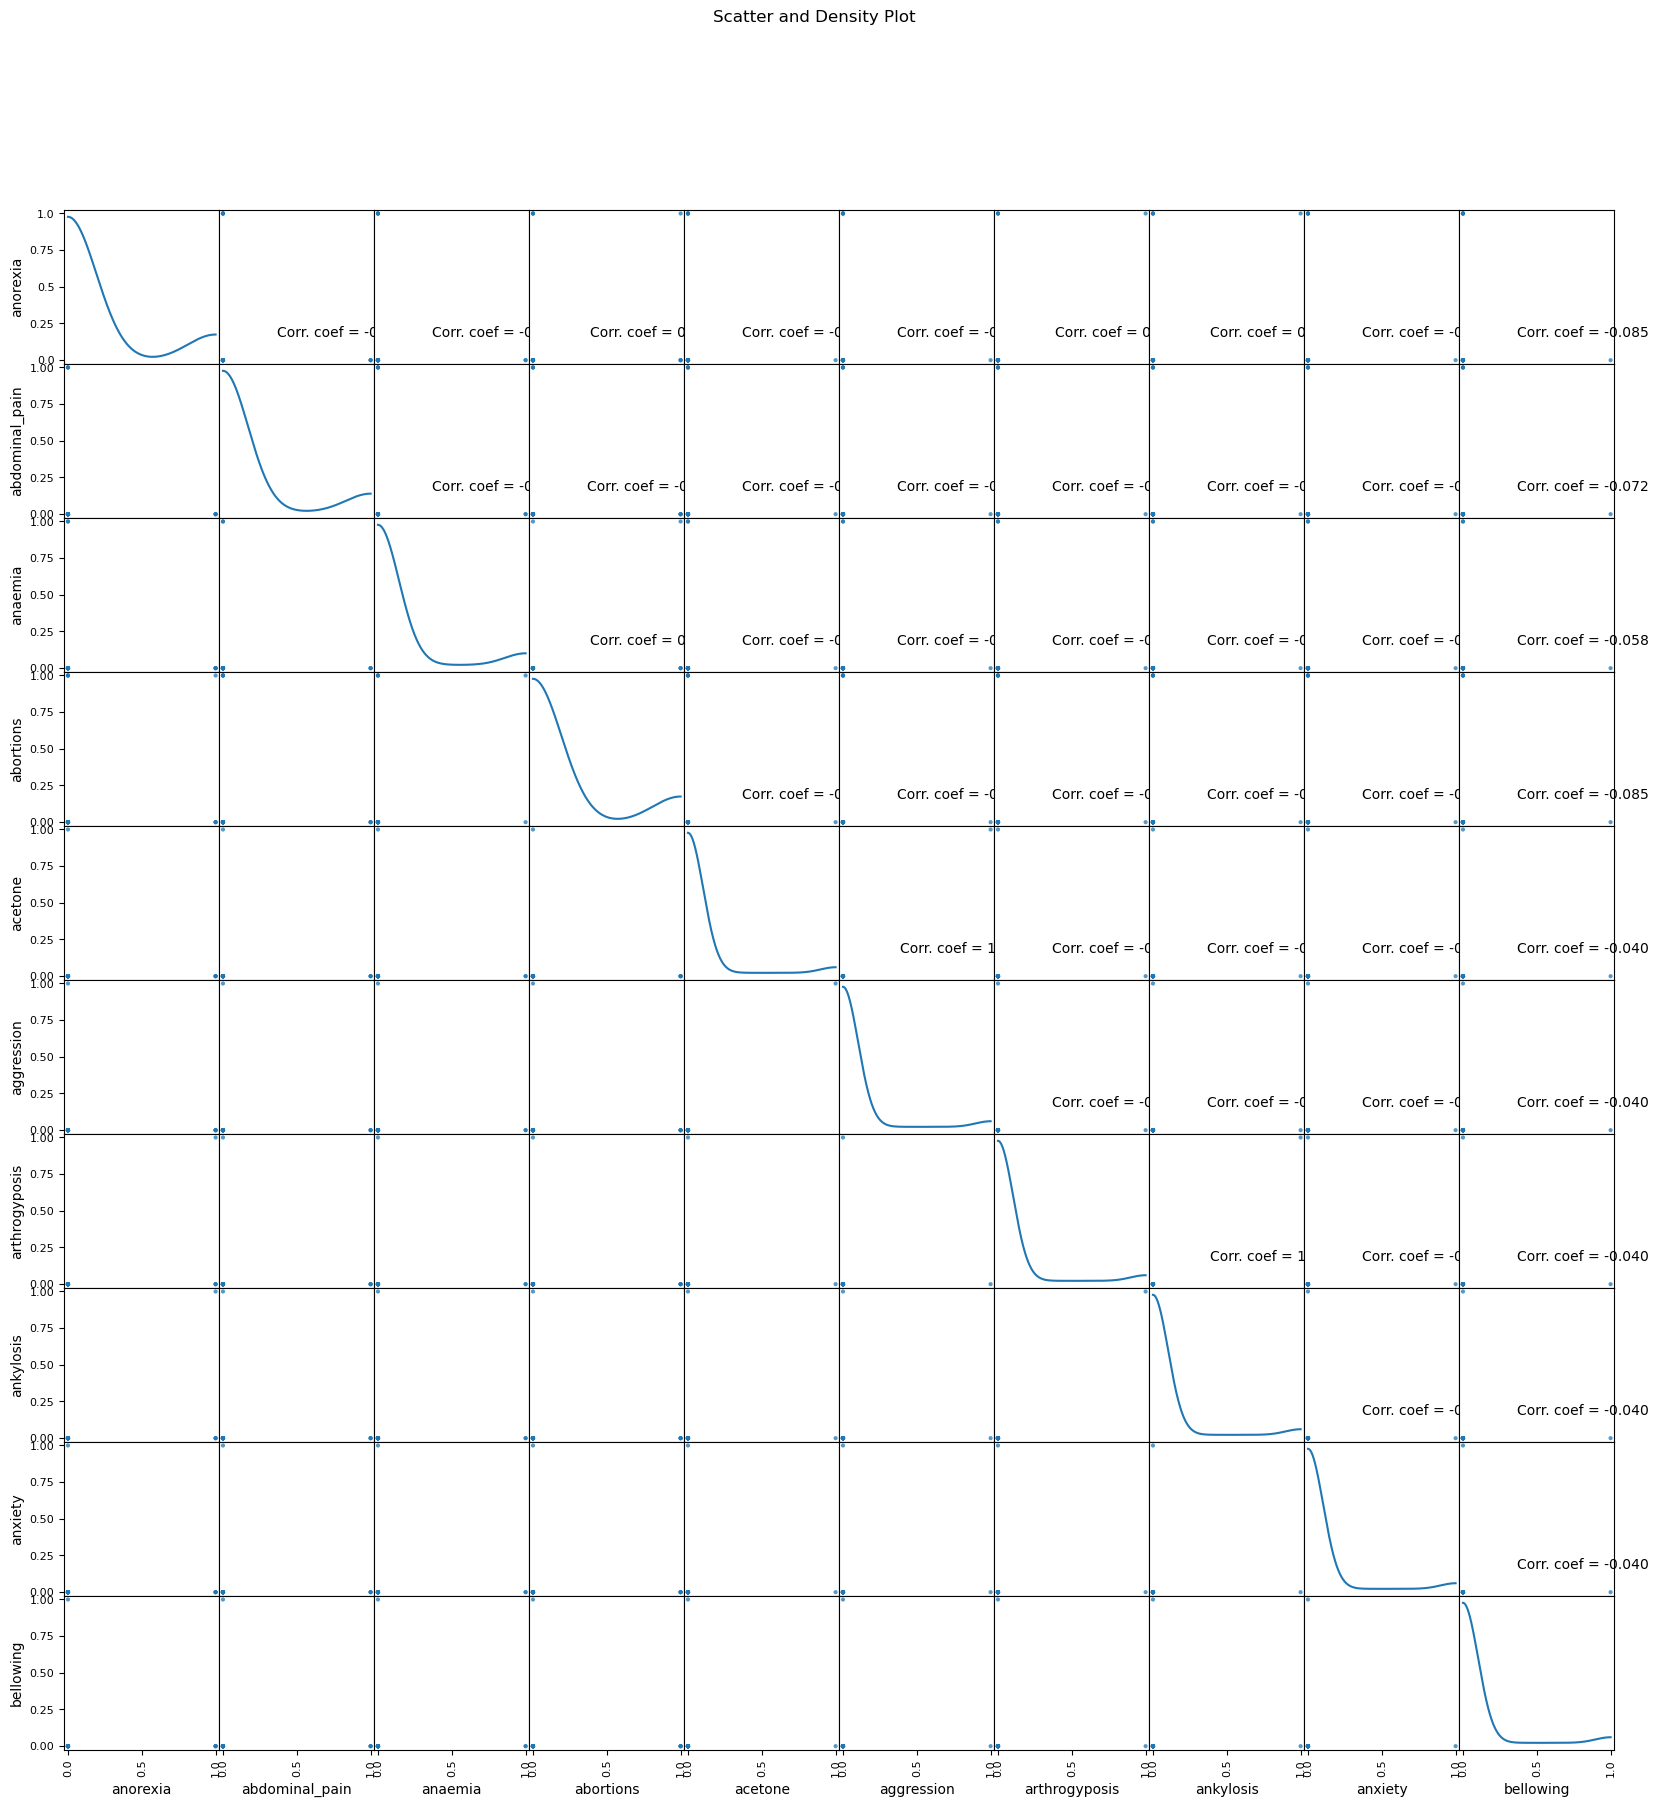

In [16]:
plotScatterMatrix(tr, 20, 10)

In [17]:
X_test= tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print(X_test)

    anorexia  abdominal_pain  anaemia  abortions  acetone  aggression  \
0          0               0        0          0        0           0   
1          1               0        0          0        0           0   
2          0               0        0          0        0           0   
3          0               0        0          0        0           0   
4          0               0        0          0        0           0   
5          0               0        0          0        0           0   
6          0               1        0          0        0           0   
7          0               0        0          1        0           0   
8          0               0        1          0        0           0   
9          0               0        0          0        0           0   
10         0               0        0          0        0           0   
11         1               0        0          1        0           0   
12         0               0        0          0   

In [18]:
print(y_test)

    prognosis
0           0
1           1
2           2
3           3
4           4
5           5
6           6
7           7
8           8
9           9
10         10
11         11
12         12
13         13
14         14
15         15
16         16
17         17
18         18
19         19
20         20
21         21
22         22
23         23
24         24
25         25


**To build the precision of the model, we utilized three distinctive algorithms which are as per the following**
* Decision Tree algorithm
* Random Forest algorithm
* Naive bayes algorithm algorithm
* K-Nearest neighbour algorithm.

Project LINK:- **Github:**https://github.com/godwins3/Cattle-disease-prediction

In [19]:
#list1 = DF['prognosis'].unique()
def scatterplt(disea):
    x = ((DF.loc[disea]).sum())#total sum of symptom reported for given disease
    x.drop(x[x==0].index,inplace=True)#droping symptoms with values 0
    print(x.values)
    y = x.keys()#storing nameof symptoms in y
    print(len(x))
    print(len(y))
    plt.title(disea)
    plt.scatter(y,x.values)
    plt.show()

def scatterinp(sym1,sym2,sym3,sym4,sym5):
    x = [sym1,sym2,sym3,sym4,sym5]#storing input symptoms in y
    y = [0,0,0,0,0]#creating and giving values to the input symptoms
    if(sym1!='Select Here'):
        y[0]=1
    if(sym2!='Select Here'):
        y[1]=1
    if(sym3!='Select Here'):
        y[2]=1
    if(sym4!='Select Here'):
        y[3]=1
    if(sym5!='Select Here'):
        y[4]=1
    print(x)
    print(y)
    plt.scatter(x,y)
    plt.show()

# Decision Tree Algorithm

In [20]:
root = Tk()
pred1=StringVar()
def DecisionTree():
    if len(NameEn) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1=="Select Here") or (Symptom2=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn import tree

        clf3 = tree.DecisionTreeClassifier() 
        clf3 = clf3.fit(X,y)

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf3.predict(X_test)
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1,Symptom2,Symptom3,Symptom4,Symptom5]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break

    
        if (h=='yes'):
            pred1.set(" ")
            pred1 = disease[a]
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        #Creating the database if not exists named as database.db and creating table if not exists named as DecisionTree using sqlite3 
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO DecisionTree(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn,Symptom1,Symptom2,Symptom3,Symptom4,Symptom5,pred1))
        conn.commit()  
        c.close() 
        conn.close()
        
        #printing scatter plot of input symptoms
        #printing scatter plot of disease predicted vs its symptoms
        scatterinp(Symptom1,Symptom2,Symptom3,Symptom4,Symptom5)
        scatterplt(pred1)

# Random Forest Algorithm

In [21]:
pred2=StringVar()
def randomforest():
    if len(NameEn) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1=="Select Here") or (Symptom2=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X,np.ravel(y))

        # calculating accuracy 
        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)
    
        psymptoms = [Symptom1,Symptom2,Symptom3,Symptom4,Symptom5]

        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred2.set(" ")
            pred2 = disease[a]
        else:
            pred2.set(" ")
            pred2.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as RandomForest using sqlite3
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO RandomForest(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn,Symptom1,Symptom2,Symptom3,Symptom4,Symptom5,pred2))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred2)

# Naive Bayes Algorithm

In [22]:
pred3=StringVar()
def NaiveBayes():
    if len(NameEn) == 0:
        pred1.set(" ")
        comp=messagebox.askokcancel("System","Kindly Fill the Name")
        if comp:
            root.mainloop()
    elif((Symptom1=="Select Here") or (Symptom2=="Select Here")):
        pred1.set(" ")
        sym=messagebox.askokcancel("System","Kindly Fill atleast first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        gnb = GaussianNB()
        gnb=gnb.fit(X,np.ravel(y))

        from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
        y_pred=gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred,normalize=False))
        print("Confusion matrix")
        conf_matrix=confusion_matrix(y_test,y_pred)
        print(conf_matrix)

        psymptoms = [Symptom1,Symptom2,Symptom3,Symptom4,Symptom5]
        for k in range(0,len(l1)):
            for z in psymptoms:
                if(z==l1[k]):
                    l2[k]=1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted=predict[0]

        h='no'
        for a in range(0,len(disease)):
            if(predicted == a):
                h='yes'
                break
        if (h=='yes'):
            pred3.set(" ")
            pred3 = disease[a]
        else:
            pred3.set(" ")
            pred3.set("Not Found")
         #Creating the database if not exists named as database.db and creating table if not exists named as NaiveBayes using sqlite3
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name StringVar,Symtom1 StringVar,Symtom2 StringVar,Symtom3 StringVar,Symtom4 TEXT,Symtom5 TEXT,Disease StringVar)")
        c.execute("INSERT INTO NaiveBayes(Name,Symtom1,Symtom2,Symtom3,Symtom4,Symtom5,Disease) VALUES(?,?,?,?,?,?,?)",(NameEn,Symptom1,Symptom2,Symptom3,Symptom4,Symptom5,pred3))
        conn.commit()  
        c.close() 
        conn.close()
        #printing scatter plot of disease predicted vs its symptoms
        scatterplt(pred3)

# Building Graphical User Interface

In [23]:
#Create a root window
root.configure(background='Whitesmoke')
root.title('Cattle disease prediction using Machine Learning')
root.resizable(0,0)

''

In [24]:
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")
Name = StringVar()

In [25]:
prev_win=None
def Reset():
    global prev_win

    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0,last=100)
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    try:
        prev_win.destroy()
        prev_win=None
    except AttributeError:
        pass

In [26]:
from tkinter import messagebox
def Exit():
    qExit=messagebox.askyesno("System","Do you want to exit the system")
    
    if qExit:
        root.destroy()
        exit()

In [27]:
#Headings for the GUI written at the top of GUI
w2 = Label(root, justify=LEFT, text=" Cattle disease prediction using Machine Learning ", fg="indigo", bg="Whitesmoke")
w2.config(font=("Times",30,"bold italic"))
w2.grid(row=1, column=0, columnspan=2, padx=100)
w2.config(font=("Times",30,"bold italic"))
w2.grid(row=2, column=0, columnspan=2, padx=100)

In [28]:
#Label for the name
NameLb = Label(root, text="Cattle ID/Name *", fg="Black", bg="White")
NameLb.config(font=("Times",15,"bold italic"))
NameLb.grid(row=6, column=0, pady=15, sticky=W)

In [29]:

#Creating Labels for the symtoms
S1Lb = Label(root, text="Symptom 1 *", fg="Black", bg="White")
S1Lb.config(font=("Times",15,"bold italic"))
S1Lb.grid(row=7, column=0, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2 *", fg="Black", bg="White")
S2Lb.config(font=("Times",15,"bold italic"))
S2Lb.grid(row=8, column=0, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3 *", fg="Black",bg="White")
S3Lb.config(font=("Times",15,"bold italic"))
S3Lb.grid(row=9, column=0, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4 *", fg="Black", bg="White")
S4Lb.config(font=("Times",15,"bold italic"))
S4Lb.grid(row=10, column=0, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Black", bg="White")
S5Lb.config(font=("Times",15,"bold italic"))
S5Lb.grid(row=11, column=0, pady=10, sticky=W)

In [30]:
#Labels for the different algorithms
lrLb = Label(root, text="DecisionTree", fg="white", bg="deepskyblue", width = 20)
lrLb.config(font=("Times",15,"bold italic"))
lrLb.grid(row=15, column=0, pady=10,sticky=W)

destreeLb = Label(root, text="RandomForest", fg="White", bg="deepskyblue", width = 20)
destreeLb.config(font=("Times",15,"bold italic"))
destreeLb.grid(row=17, column=0, pady=10, sticky=W)


knnLb = Label(root, text="Naive Bayes", fg="White", bg="deepskyblue", width = 20)
knnLb.config(font=("Times",15,"bold italic"))
knnLb.grid(row=19, column=0, pady=10, sticky=W)
OPTIONS = sorted(l1)

In [31]:
#Taking name as input from user
NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

#Taking Symptoms as input from the dropdown from the user
S1 = OptionMenu(root, Symptom1,*OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2,*OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3,*OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4,*OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5,*OPTIONS)
S5.grid(row=11, column=1)

In [32]:
#Buttons for predicting the disease using different algorithms
dst = Button(root, text="Prediction 1", command=DecisionTree,bg="deepskyblue",fg="White")
dst.config(font=("Times",15,"bold italic"))
dst.grid(row=6, column=3,padx=10)

rnf = Button(root, text="Prediction 2", command=randomforest,bg="Purple",fg="White")
rnf.config(font=("Times",15,"bold italic"))
rnf.grid(row=7, column=3,padx=10)

lr = Button(root, text="Prediction 3", command=NaiveBayes,bg="royalblue",fg="white")
lr.config(font=("Times",15,"bold italic"))
lr.grid(row=9, column=3,padx=10)

rs = Button(root,text="Reset Inputs", command=Reset,bg="crimson",fg="White",width=15)
rs.config(font=("Times",15,"bold italic"))
rs.grid(row=10,column=3,padx=10)

ex = Button(root,text="Exit System", command=Exit,bg="crimson",fg="White",width=15)
ex.config(font=("Times",15,"bold italic"))
ex.grid(row=11,column=3,padx=10)

In [33]:
#Showing the output of different algorithms
t1=Label(root,font=("Times",15,"bold italic"),text="Decision Tree",height=1,bg="deepskyblue"
         ,width=40,fg="white",textvariable=pred1,relief="sunken").grid(row=15, column=1, padx=10)

t2=Label(root,font=("Times",15,"bold italic"),text="Random Forest",height=1,bg="Purple"
         ,width=40,fg="white",textvariable=pred2,relief="sunken").grid(row=17, column=1, padx=10)

t3=Label(root,font=("Times",15,"bold italic"),text="Naive Bayes",height=1,bg="lightseagreen"
         ,width=40,fg="white",textvariable=pred3,relief="sunken").grid(row=19, column=1, padx=10)

Decision Tree
Accuracy
1.0
26
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 

c:\Users\Matt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


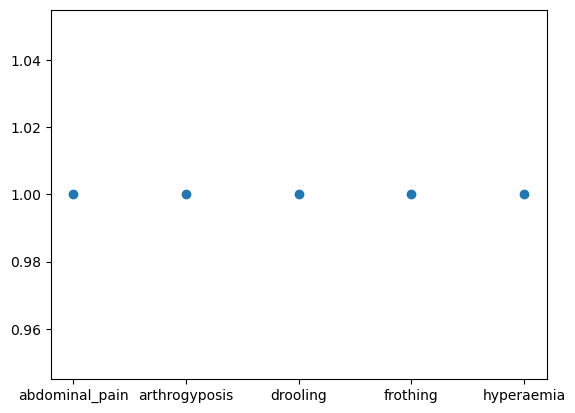

[141 129 110 116 117 122 135 127]
8
8


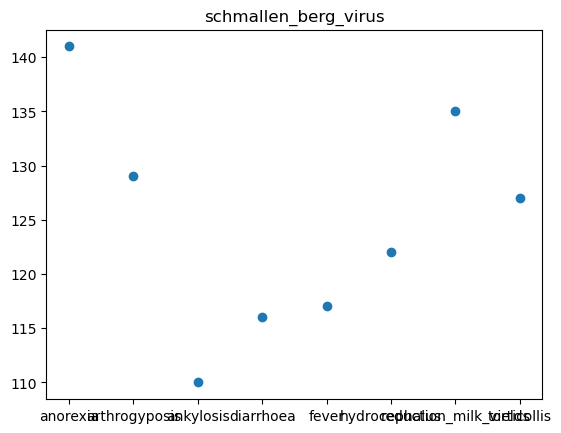

Random Forest
Accuracy
1.0
26
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 

c:\Users\Matt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


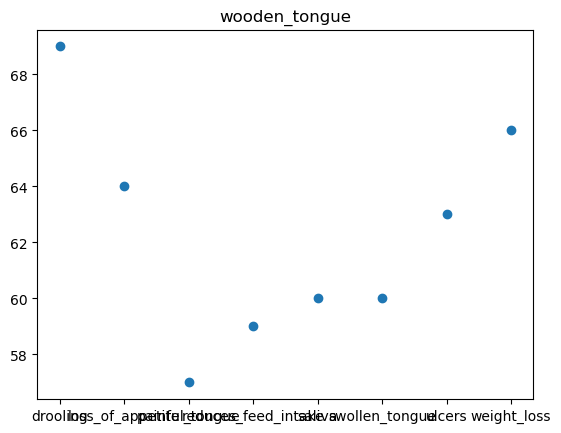

Naive Bayes
Accuracy
1.0
26
Confusion matrix
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

c:\Users\Matt\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


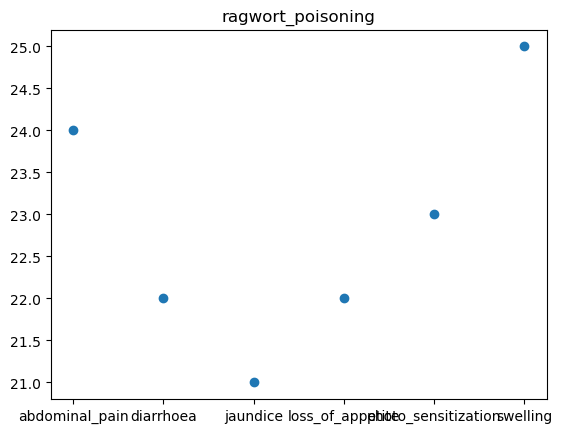

: 

In [34]:
#Mainloop the application is ready to run
root.mainloop()